In [124]:
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import investpy
import arch
import pylab 

In [8]:
index = investpy.get_index_historical_data(index='Bovespa', country='brazil', from_date='01/01/1990', to_date='13/05/2021')

In [9]:
copy = index.copy()['Close']

In [10]:
index = index.reset_index()[['Date','Close','Volume']]

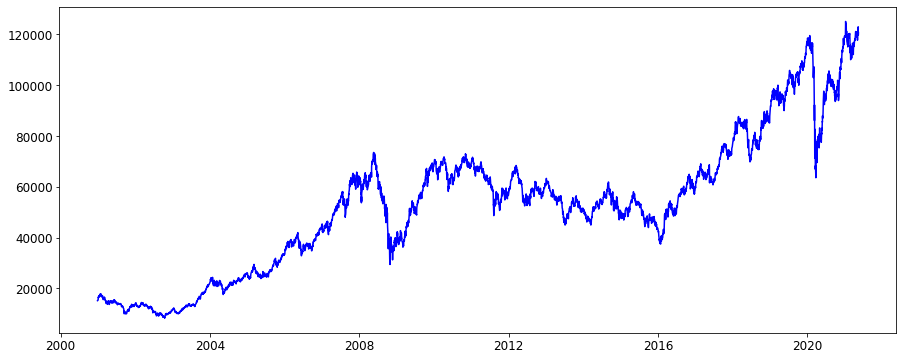

In [26]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(index.Date, index.Close, color='blue', label='Windspeed')

In [27]:
index['Returns'] = index['Close'].pct_change() * 100

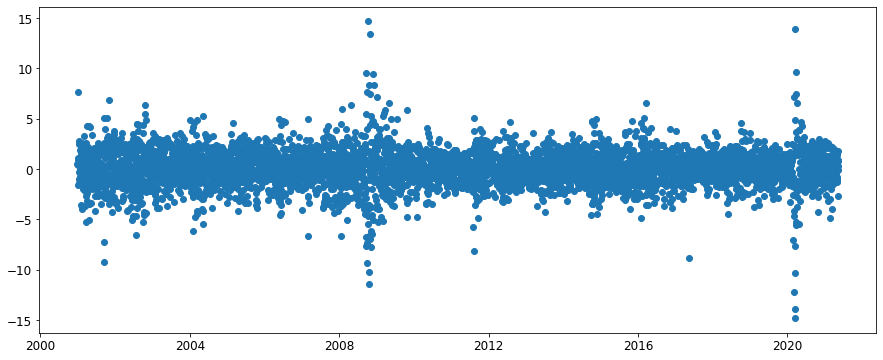

In [28]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(15, 6))
plt.scatter(index.Date, index.Returns)
plt.show()

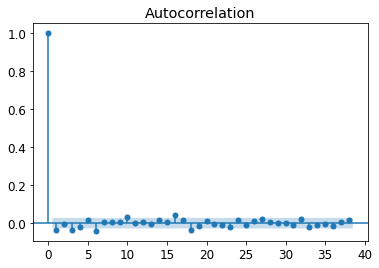

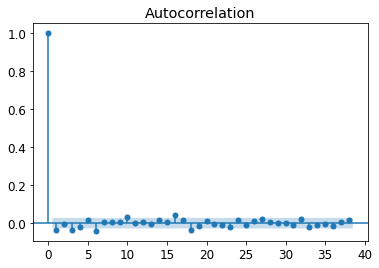

In [25]:
plt.rc('font', size=12)
plot_acf(copy.pct_change().dropna())

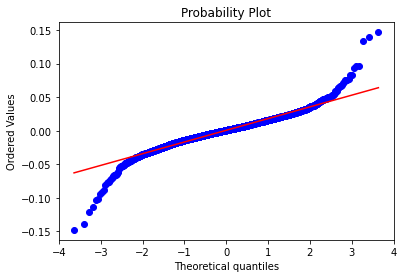

In [36]:
stats.probplot(copy.pct_change().dropna(), dist="norm", plot=pylab)
pylab.show()

In [76]:
train_df = copy[:4900]

In [77]:
test_df = copy[4900:]

In [90]:
copy = copy.pct_change().dropna() * 100

In [114]:
X = copy.reset_index()['Close']

In [93]:
from sklearn.model_selection import TimeSeriesSplit

In [94]:
tscv = TimeSeriesSplit()

In [119]:
for train_index, test_index in tscv.split(X):
    train_df, test_df = X[train_index], X[test_index]

In [120]:
model = SARIMAX(train_df, order = (1, 0, 1))
# Fitting the Model
model_results = model.fit()

# Printing the model summary
print(model_results.summary())

c:\users\luisf\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\users\luisf\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4201
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -8378.662
Date:                Sat, 15 May 2021   AIC                          16763.323
Time:                        12:09:01   BIC                          16782.352
Sample:                             0   HQIC                         16770.052
                               - 4201                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0002     24.857   7.51e-06      1.000     -48.718      48.718
ma.L1          0.0002     24.858    7.2e-06      1.000     -48.721      48.721
sigma2         3.1614      0.040     78.411      0.0

In [121]:
arma_forecast = model_results.get_forecast(len(test_df.index))
arma_predictions_df = arma_forecast.conf_int(alpha = 0.05)

In [122]:
arma_predictions_df["Predictions"] = model_results.predict(start = test_df.index[0], end = test_df.index[-1])

In [126]:
arma_rmse = np.sqrt(mean_squared_error(test_df.values, arma_predictions_df["Predictions"]))

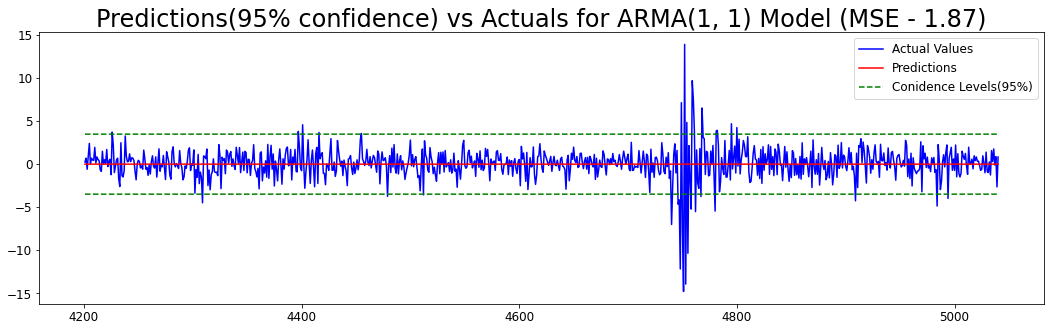

In [129]:
plt.rcParams["figure.figsize"] = 18, 5

# Plot the Actuals
plt.plot(test_df, color = "blue", label = "Actual Values")

# Plot the Forecasts and the Confidence Intervals 
plt.plot(arma_predictions_df["Predictions"][test_df.index], color = "red", label = "Predictions")
plt.plot(arma_predictions_df["upper Close"][test_df.index], color = "green", linestyle = "--", label = "Conidence Levels(95%)")
plt.plot(arma_predictions_df["lower Close"][test_df.index], color = "green", linestyle = "--")

# Set the Title of the Plot
plt.title(f"Predictions(95% confidence) vs Actuals for ARMA(1, 1) Model (MSE - {round(arma_rmse, 2)})", size = 24)

# Display the plot with appropriate labels
plt.legend()
plt.show()

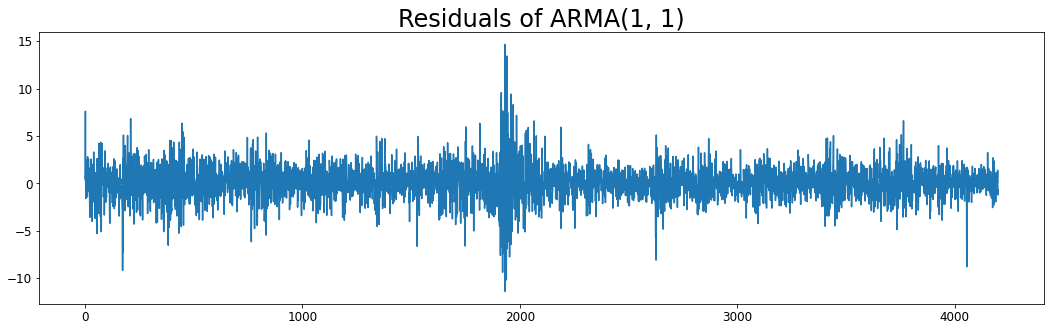

In [130]:
plt.rcParams["figure.figsize"] = 18, 5

# Plotting residuals
plt.plot(model_results.resid, label = "Residuals")

# Setting Title
plt.title("Residuals of ARMA(1, 1)", size = 24)

# Display the plot
plt.show()

References:

Towards AI. Statistical Forecasting for Time Series Data Part 5: ARMA+GARCH model for Time Series Forecasting (2020), https://towardsai.net/p/data-visualization/statistical-forecasting-for-time-series-data-part-5-armagarch-model-for-time-series-forecasting